In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# 새 섹션

In [ ]:
!mkdir ~/.kaggle/
from google.colab import drive
drive.mount('/content/drive')

! cp "/content/drive/MyDrive/kaggle API/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!python -m pip install -qq kaggle
!kaggle competitions download playground-series-s4e2                ## competitions(join 먼저 해야 함) or datasets > change data name
!unzip -qq "playground-series-s4e2"                                 ## change data name

Mounted at /content/drive
  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 121MB/s]


## **Dataset**
https://www.kaggle.com/competitions/playground-series-s4e2  
The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.
<br/><br/>
**The attributes related with eating habits are:**   
Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), Consumption of alcohol (CALC)  

**The attributes related with the physical condition are:**   
Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)  

**Variables obtained :**  
Gender, Age, Height and Weight  

**NObesity values are:**  
•Underweight Less than 18.5  
•Normal 18.5 to 24.9  
•Overweight 25.0 to 29.9  
•Obesity I 30.0 to 34.9  
•Obesity II 35.0 to 39.9  
•Obesity III Higher than 40  

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

print(train.shape, test.shape)

(20758, 18) (13840, 17)


In [ ]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

*  train 과 test 데이터셋에는 null 값이 없음

In [ ]:
train_unique = train.nunique() # len(unique()) 와 동일함
print(train_unique)

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64


In [ ]:
test_unique = test.nunique()
print(test_unique)

id                                13840
Gender                                2
Age                                1539
Height                             1739
Weight                             1798
family_history_with_overweight        2
FAVC                                  2
FCVC                                828
NCP                                 649
CAEC                                  4
SMOKE                                 2
CH2O                               1366
SCC                                   2
FAF                                1260
TUE                                1172
CALC                                  4
MTRANS                                5
dtype: int64


In [ ]:
for col in train.select_dtypes(include='object'):
  print(col, ": ", train[col].unique())

Gender :  ['Male' 'Female']
family_history_with_overweight :  ['yes' 'no']
FAVC :  ['yes' 'no']
CAEC :  ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE :  ['no' 'yes']
SCC :  ['no' 'yes']
CALC :  ['Sometimes' 'no' 'Frequently']
MTRANS :  ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad :  ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [ ]:
for col in test.select_dtypes(include='object'):
  print(col, ": ", test[col].unique())

Gender :  ['Male' 'Female']
family_history_with_overweight :  ['yes' 'no']
FAVC :  ['yes' 'no']
CAEC :  ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE :  ['no' 'yes']
SCC :  ['no' 'yes']
CALC :  ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS :  ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


*  test 데이터셋의 CALC(Consumption of alcohol) 변수에 train 데이터셋에는 없는 'Always' 값이 있어서 -> 나중에 분류 모형 만들 때 참고 ?

### **시각화**

In [ ]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# OBSITY 그룹별 COUNT, 평균값 계산
grouped = train.groupby("NObeyesdad")
gg = grouped.size().reset_index()
gg.columns = ["Obesity", "count"]
gg['pct'] = round((gg['count'] / len(train.index)) * 100,3)
gg

,Obesity,count,pct
0,Insufficient_Weight,2523,12.154
1,Normal_Weight,3082,14.847
2,Obesity_Type_I,2910,14.019
3,Obesity_Type_II,3248,15.647
4,Obesity_Type_III,4046,19.491
5,Overweight_Level_I,2427,11.692
6,Overweight_Level_II,2522,12.150


In [ ]:
nums = train._get_numeric_data().columns
nums = nums[1:]
nums

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [ ]:
tab = train.groupby("NObeyesdad")[nums].agg(['mean','count']).reset_index()
tab.columns = ['Obesity_level','Age_mean','Age_count',"Height_mean","Height_count","Weight_mean","Weight_count","FCVC_mean","FCVC_count","NCP_mean","NCP_count","CH2O_mean","CH20_count","FAF_mean","FAF_count","TUE_mean","TUE_count"]
tab

,Obesity_level,Age_mean,Age_count,Height_mean,Height_count,Weight_mean,Weight_count,FCVC_mean,FCVC_count,NCP_mean,NCP_count,CH2O_mean,CH20_count,FAF_mean,FAF_count,TUE_mean,TUE_count
0,Insufficient_Weight,19.336502,2523,1.683693,2523,49.860773,2523,2.479756,2523,2.919554,2523,1.744163,2523,1.201782,2523,0.802901,2523
1,Normal_Weight,20.801388,3082,1.670744,3082,61.533289,3082,2.372249,3082,2.889552,3082,1.806204,3082,1.189580,3082,0.630216,3082
2,Obesity_Type_I,25.023615,2910,1.693509,2910,92.371026,2910,2.097052,2910,2.454551,2910,2.129783,2910,0.922710,2910,0.739477,2910
3,Obesity_Type_II,27.707128,3248,1.782715,3248,115.995914,3248,2.425227,3248,2.798439,3248,1.985064,3248,1.029579,3248,0.415601,3248
4,Obesity_Type_III,24.126847,4046,1.676007,4046,117.697452,4046,3.000000,4046,2.999950,4046,2.332338,4046,0.549225,4046,0.548849,4046
5,Overweight_Level_I,23.045197,2427,1.686880,2427,74.228266,2427,2.256583,2427,2.528178,2427,2.069366,2427,1.134657,2427,0.557014,2427
6,Overweight_Level_II,26.032084,2522,1.706163,2522,82.085513,2522,2.224499,2522,2.594109,2522,2.004470,2522,1.060895,2522,0.697984,2522


In [ ]:
tab['pct'] = (tab['Age_count'] / len(train.index)) * 100
tab

,Obesity_level,Age_mean,Age_count,Height_mean,Height_count,Weight_mean,Weight_count,FCVC_mean,FCVC_count,NCP_mean,NCP_count,CH2O_mean,CH20_count,FAF_mean,FAF_count,TUE_mean,TUE_count,pct
0,Insufficient_Weight,19.336502,2523,1.683693,2523,49.860773,2523,2.479756,2523,2.919554,2523,1.744163,2523,1.201782,2523,0.802901,2523,12.154350
1,Normal_Weight,20.801388,3082,1.670744,3082,61.533289,3082,2.372249,3082,2.889552,3082,1.806204,3082,1.189580,3082,0.630216,3082,14.847288
2,Obesity_Type_I,25.023615,2910,1.693509,2910,92.371026,2910,2.097052,2910,2.454551,2910,2.129783,2910,0.922710,2910,0.739477,2910,14.018692
3,Obesity_Type_II,27.707128,3248,1.782715,3248,115.995914,3248,2.425227,3248,2.798439,3248,1.985064,3248,1.029579,3248,0.415601,3248,15.646979
4,Obesity_Type_III,24.126847,4046,1.676007,4046,117.697452,4046,3.000000,4046,2.999950,4046,2.332338,4046,0.549225,4046,0.548849,4046,19.491280
5,Overweight_Level_I,23.045197,2427,1.686880,2427,74.228266,2427,2.256583,2427,2.528178,2427,2.069366,2427,1.134657,2427,0.557014,2427,11.691878
6,Overweight_Level_II,26.032084,2522,1.706163,2522,82.085513,2522,2.224499,2522,2.594109,2522,2.004470,2522,1.060895,2522,0.697984,2522,12.149533


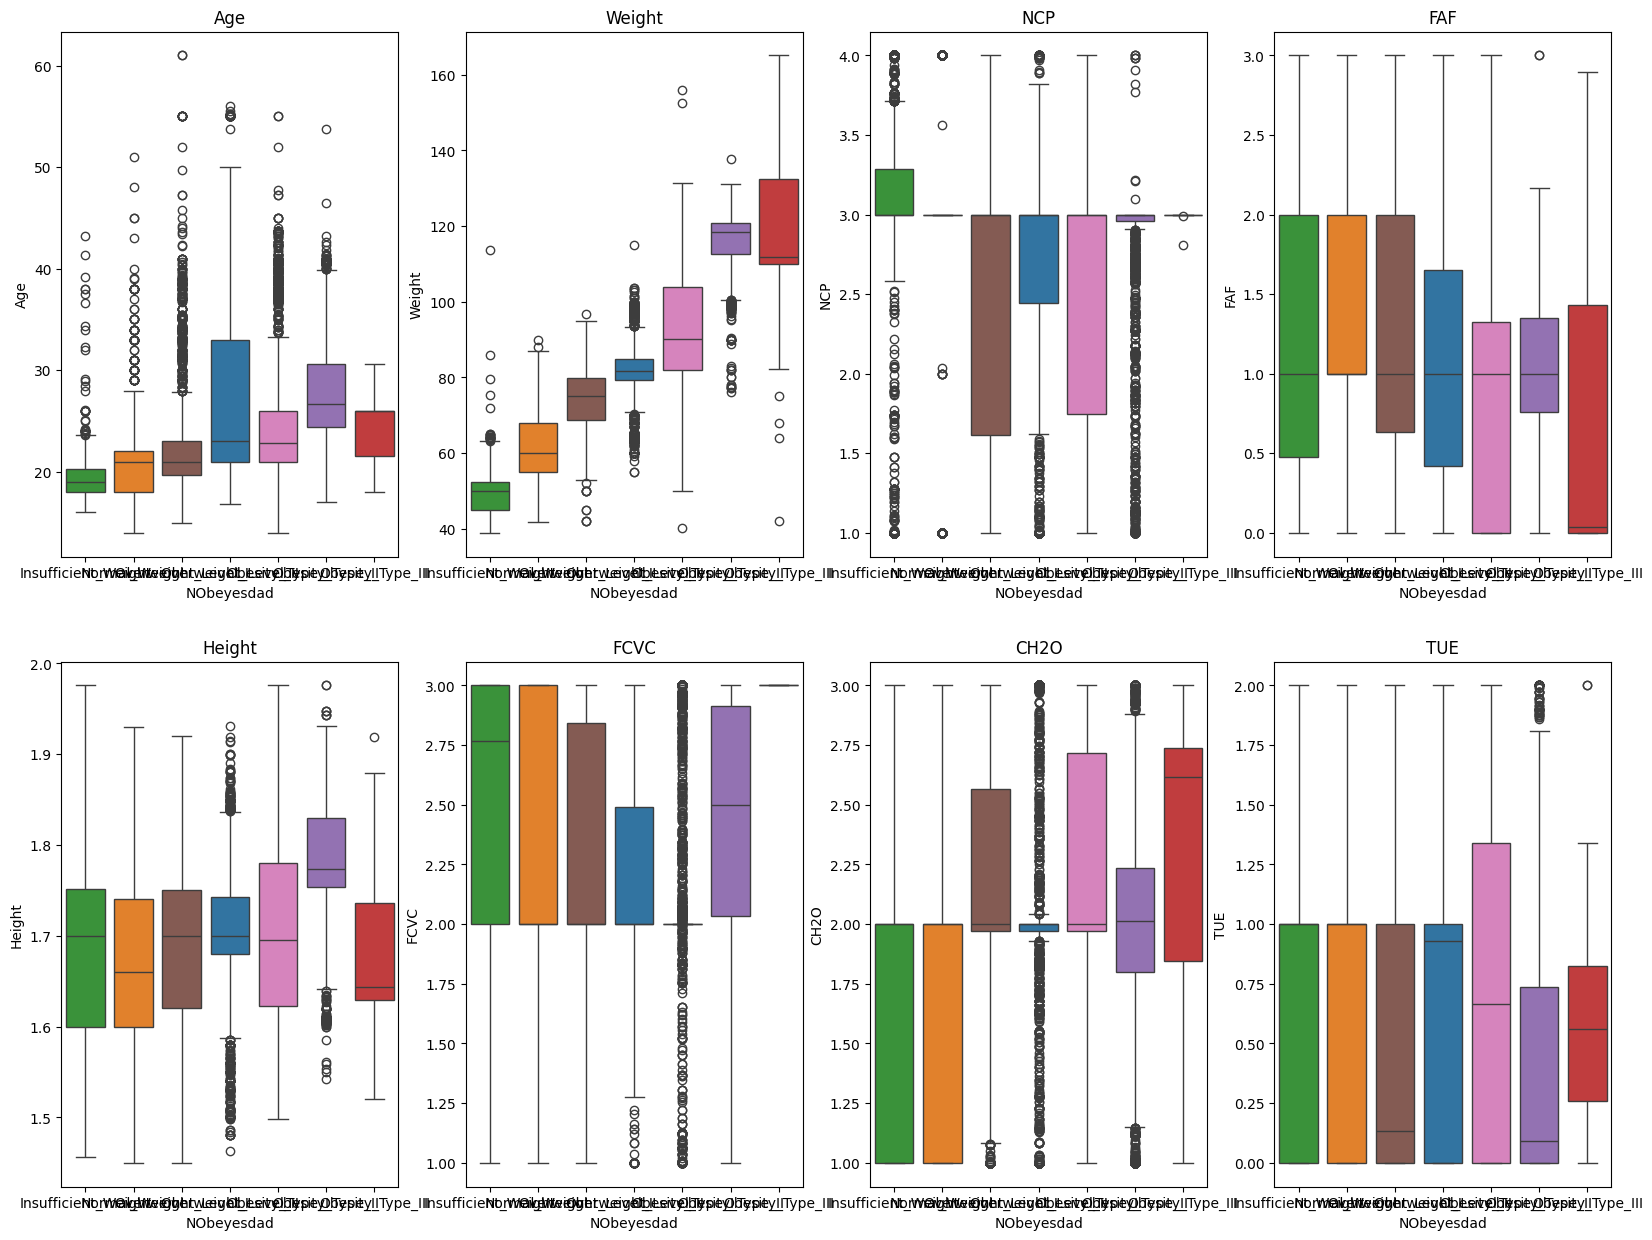

In [ ]:
# obesity값으로 색상을 다르게 하여 히스토그램으로 시각화
num_cols = train._get_numeric_data().columns.tolist()
num_cols = num_cols[1:]
ordering = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
for i, num_cols in enumerate(num_cols):
  rows = i % 2
  cols = i // 2
  sns.boxplot(train,x="NObeyesdad",y=num_cols,hue="NObeyesdad",ax=axes[rows][cols],order=ordering).set(title=num_cols)


*   AGE: 비만일수록 평균 나이 증가함
*   HEIGHT: 대체로 비슷하나 normal과 OB_3에서 낮고 OB_2에서 높음  
*   WEIGHT: 비만일수록 몸무게 증가함
*   FCVC (채소 섭취 횟수): 대체로 비슷함
*   NCP (식사 횟수): insufficient만 3회 이상 식사함 --> 잦은 소식  
*   CH20 (물 섭취): insufficient와 normal이 가장 적은 양의 물 마심 --> 과체중, 비만그룹은 다 잘 먹음
*   FAF (신체활동 횟수): 비만일수록 신체활동 감소함
*   TUE (전자기기 사용 시간): 비만일수록 전자기기 사용 시간 증가함



---



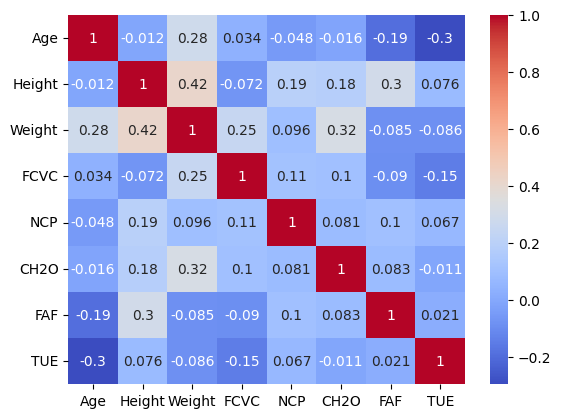

In [ ]:
# 만약 heatmap으로 상관계수를 구했다면,
num_cols = train._get_numeric_data().columns.tolist()
num_cols = num_cols[1:]

df_matrix = train[num_cols]
df_corr = df_matrix.corr()
sns.heatmap(data=df_corr, annot=True, cmap="coolwarm")
plt.show()
# 뚜렷한 양적 상관관계가 있는 변수는 WEIGHT와 HEIGHT 뿐임
# 약한 양적 상관관계는 AGE-WEIGHT, HEIGHT-FAF(신체활동횟수), WEIGHT-FCVC(채소섭취횟수), WEIGHT-CH20(물섭취)
# 약한 음적 상관관계는 AGE-TUE(전자기기사용)에서 발견함

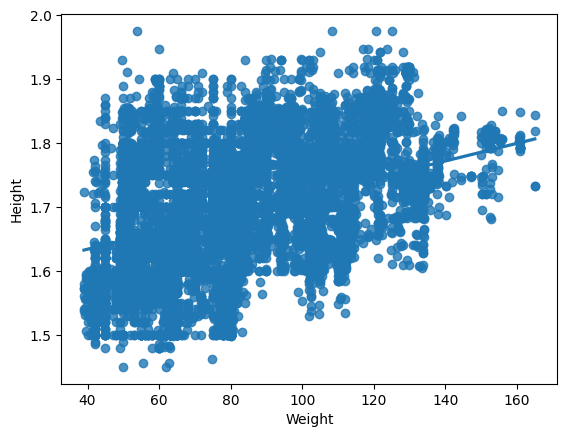

In [ ]:
# 뚜렷한 양적 상관관계가 있는 변수는 WEIGHT와 HEIGHT 뿐임
# 약한 양적 상관관계는 AGE-WEIGHT, HEIGHT-FAF(신체활동횟수), WEIGHT-FCVC(채소섭취횟수), WEIGHT-CH20(물섭취)
# 약한 음적 상관관계는 AGE-TUE(전자기기사용)에서 발견함

# WEIGHT와 HEIGHT로 regplot 그리기
sns.regplot(data=df_matrix, x="Weight", y="Height")
plt.show()

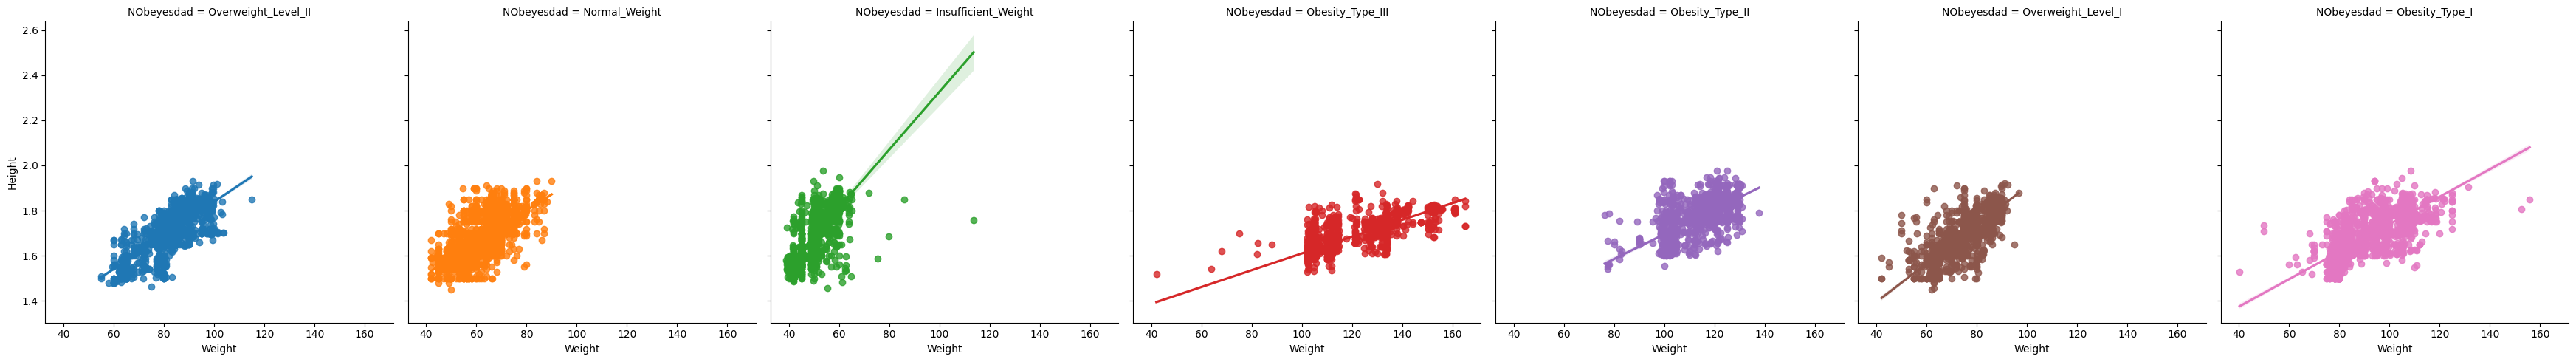

In [ ]:
sns.lmplot(data=train, x="Weight", y="Height", hue="NObeyesdad", col="NObeyesdad")
plt.show()

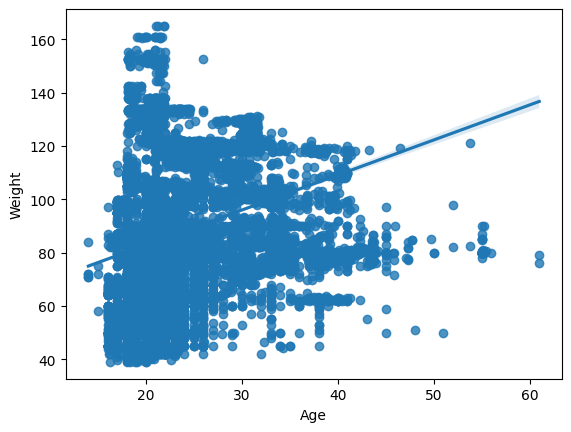

In [ ]:
# AGE-WEIGHT regplot 그리기
sns.regplot(data=df_matrix, x="Age", y="Weight")
plt.show()

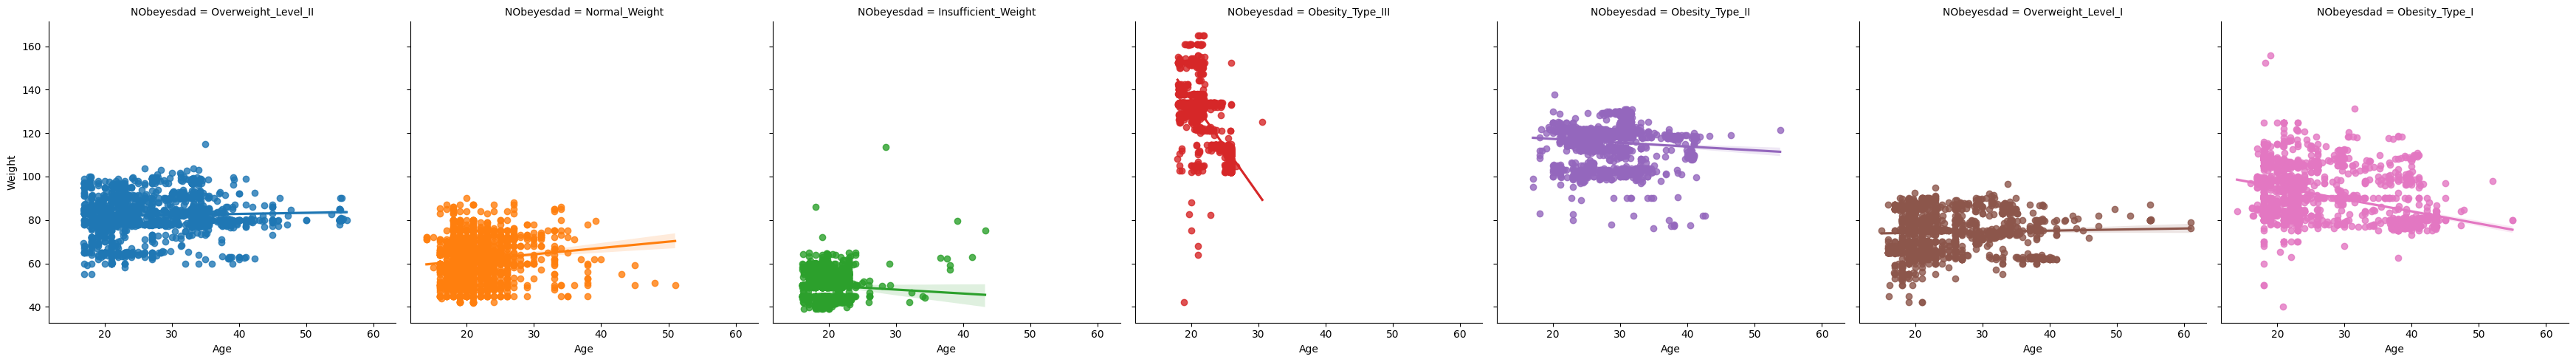

In [ ]:
sns.lmplot(data=train, x="Age", y="Weight", hue="NObeyesdad", col="NObeyesdad")
plt.show()

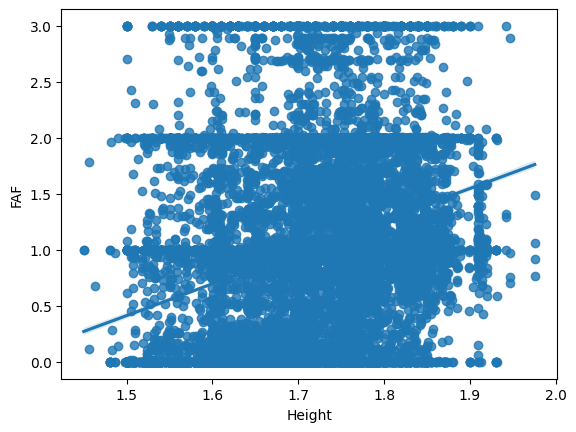

In [ ]:
# HEIGHT-FAF regplot 그리기
sns.regplot(data=df_matrix, x="Height", y="FAF")
plt.show()

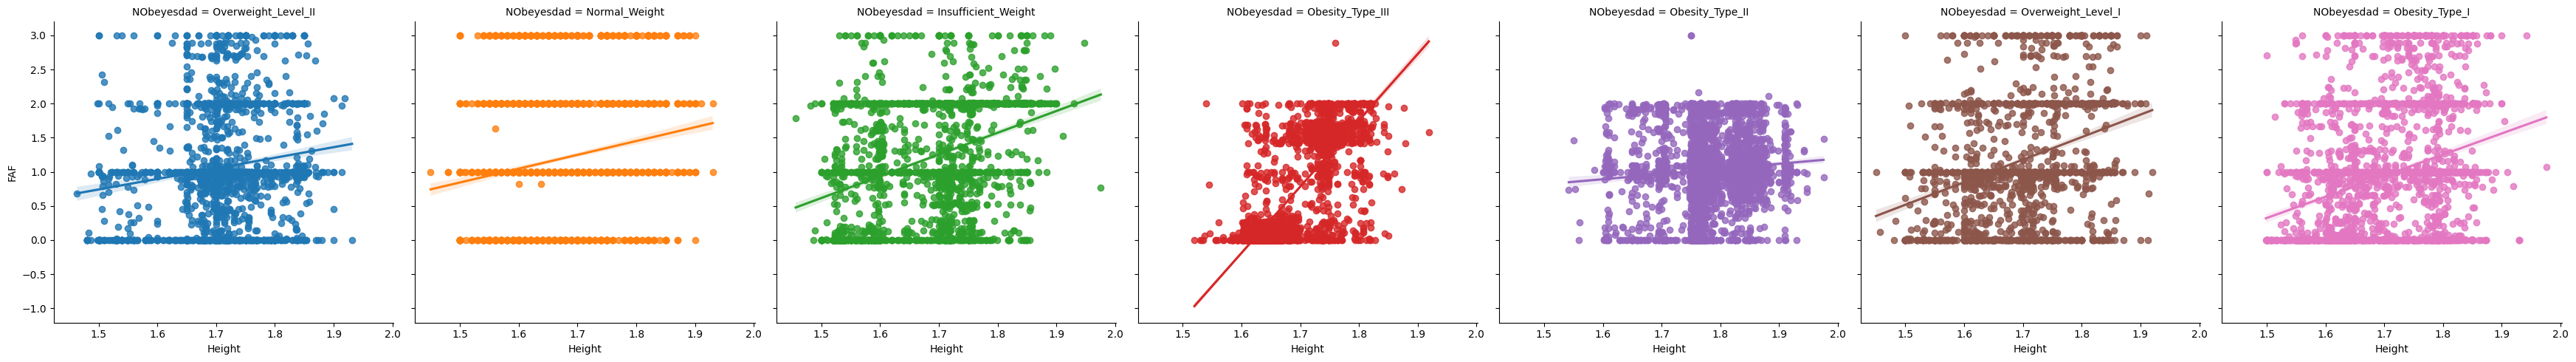

In [ ]:
sns.lmplot(data=train, x="Height", y="FAF", hue="NObeyesdad", col="NObeyesdad")
plt.show()

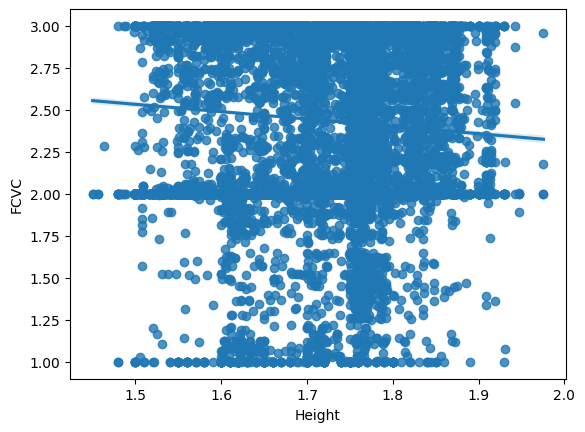

In [ ]:
# WEIGHT-FCVC regplot 그리기
sns.regplot(data=df_matrix, x="Height", y="FCVC")
plt.show()

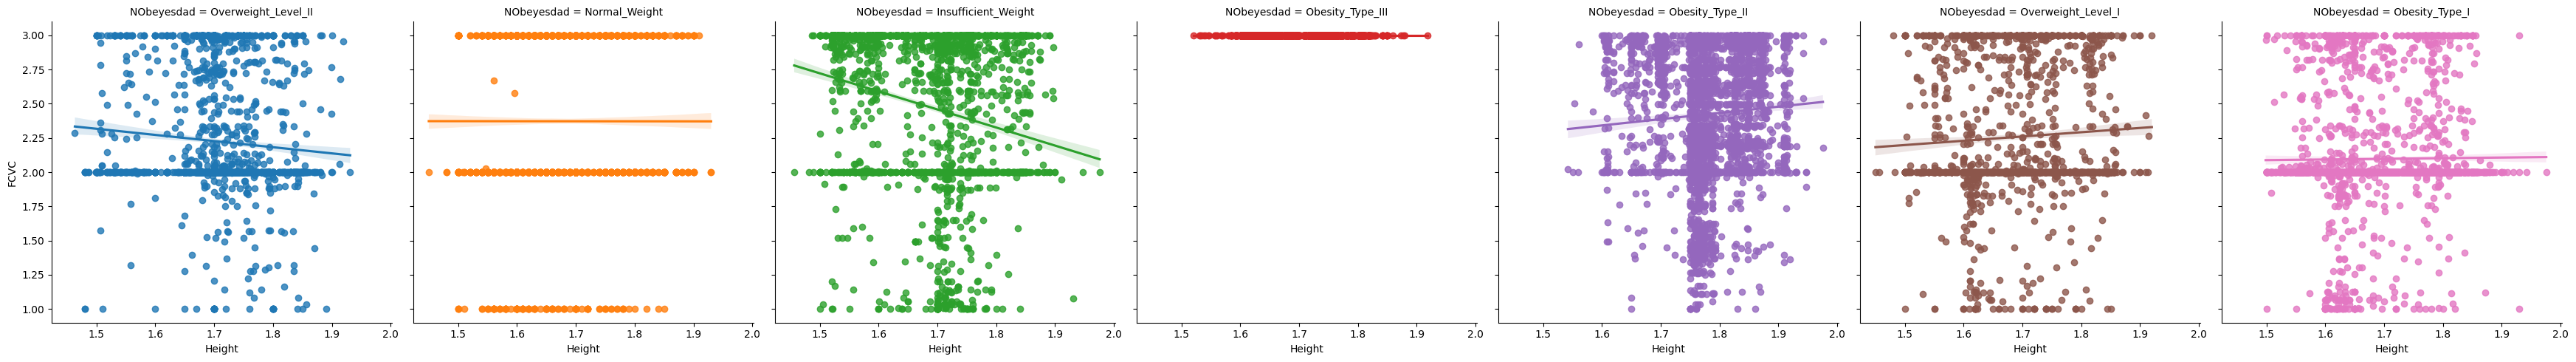

In [ ]:
sns.lmplot(data=train, x="Height", y="FCVC", hue="NObeyesdad", col="NObeyesdad")
plt.show()

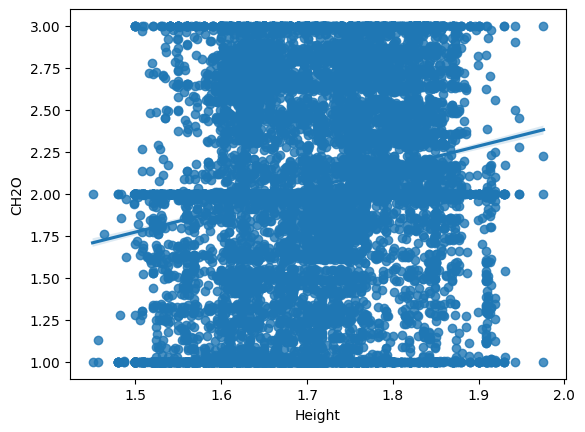

In [ ]:
# WEIGHT-CH20 regplot 그리기
sns.regplot(data=df_matrix, x="Height", y="CH2O")
plt.show()

In [ ]:
test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


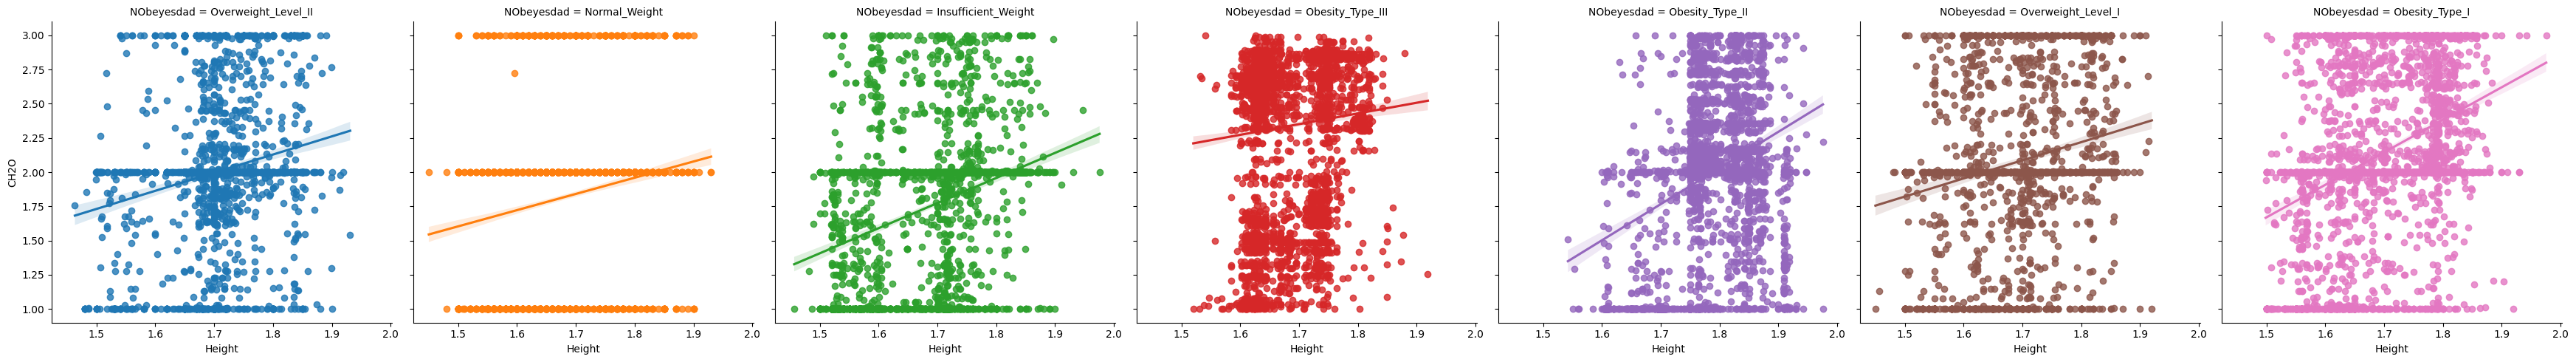

In [ ]:
sns.lmplot(data=train, x="Height", y="CH2O", hue="NObeyesdad", col="NObeyesdad")
plt.show()

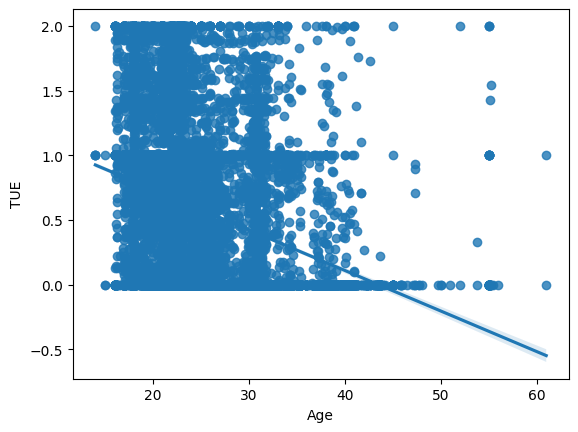

In [ ]:
# AGE-TUE regplot 그리기
sns.regplot(data=df_matrix, x="Age", y="TUE")
plt.show()

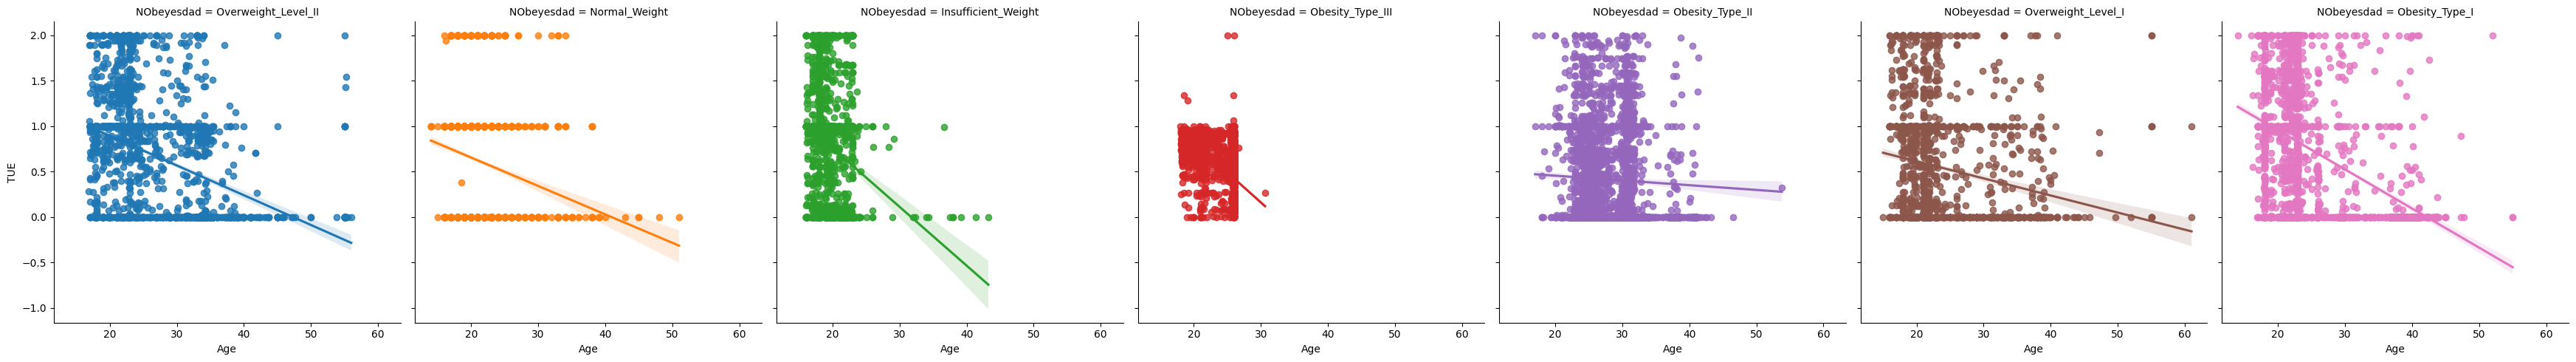

In [ ]:
sns.lmplot(data=train, x="Age", y="TUE", hue="NObeyesdad", col="NObeyesdad")
plt.show()